### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [2]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [3]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных
data.isna().sum()
### Your code is here

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [4]:
### Your code is here
instead_num = data['passenger_count'].value_counts().index[0]
data['passenger_count'] = data['passenger_count'].fillna(instead_num)

In [5]:
round(instead_num,2)

930.4

In [6]:
data.isna().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [7]:
### Your code is here
import pandas as pd

categorical_columns = ['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']
grouped_means = data.groupby(categorical_columns)['distance_km'].transform('mean')
data['distance_km'] = data['distance_km'].fillna(grouped_means)

In [8]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data.isna().sum()

vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
log_trip_duration     0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

In [10]:
data.head(20).to_csv('output.csv', sep=';', index=False)

In [11]:
### Убедимся, что пропусков не осталось

### Your code is here


### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [12]:
from sklearn.model_selection import KFold,cross_val_score

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here
x = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']

model = LinearRegression()

# Use cross_val_score to perform cross-validation
cross_val_errors = -cross_val_score(model, x, y, cv=selector, scoring='neg_mean_squared_error')
print(cross_val_errors)
# Calculate mean of the cross-validation errors
cross_val_error = np.mean(cross_val_errors)

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

[0.45104813 0.44555323 0.40741744 0.41963126]
MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

In [13]:
data['log_trip_duration']

id
id2875421    6.122493
id2377394    6.498282
id3858529    7.661527
id3504673    6.063785
id2181028    6.077642
               ...   
id2376096    6.658011
id1049543    6.486161
id2304944    6.639876
id2714485    5.924256
id1209952    5.293305
Name: log_trip_duration, Length: 1458644, dtype: float64

In [14]:
data['log_trip_duration'].values

array([6.12249281, 6.49828215, 7.66152708, ..., 6.63987583, 5.9242558 ,
       5.29330482])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d908276e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9082807d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9082762d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d908281e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d908282990>],
 'means': []}

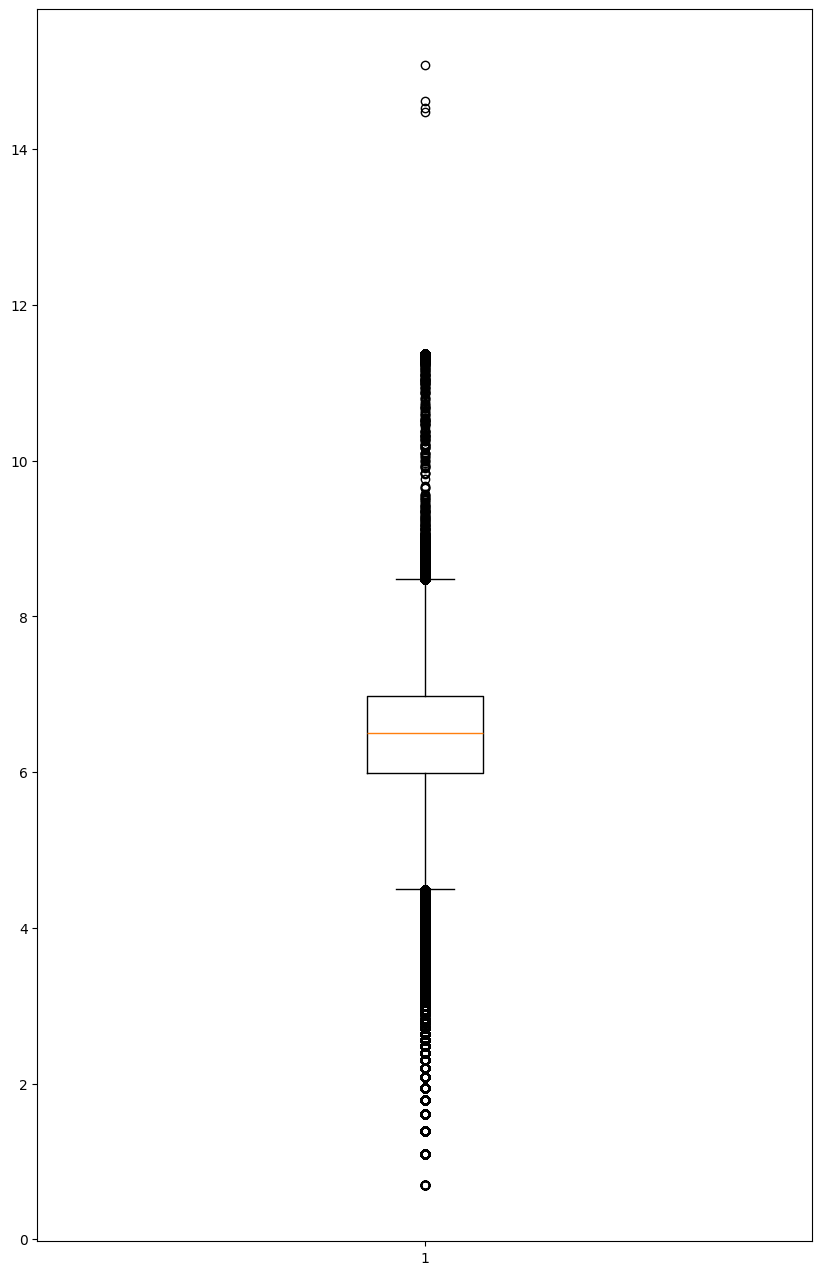

In [15]:
import matplotlib.pyplot as plt

### Your code is here
fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(data['log_trip_duration'].values)

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [16]:
### Your code is here
q_high = data['log_trip_duration'].quantile(0.995)
print(q_high)
q_low = data['log_trip_duration'].quantile(0.005)
print(q_low)

tentacle_length = q_high - q_low

8.32845106681936
3.9318256327243257


Снова замерьте качество на кросс-валидации, используя старый selector

In [17]:
data.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
### Your code is here
upper_tentacle = q_high + 1.5 * tentacle_length
lower_tentacle = q_low - 1.5 * tentacle_length

In [19]:
print(upper_tentacle)
print(lower_tentacle)

14.923389217961912
-2.663112518418225


In [20]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
data[(upper_tentacle > data['log_trip_duration']) & (data['log_trip_duration'] > lower_tentacle)]

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# import matplotlib.pyplot as plt
# 
# ### Your code is here
# fig = plt.figure()
# 
# fig.set_size_inches((10, 16))
# 
# plt.boxplot(data[(upper_tentacle > data['log_trip_duration']) & (data['log_trip_duration'] > lower_tentacle)].values)

In [28]:
filtered_data = data[(data['log_trip_duration'] < lower_tentacle) | (data['log_trip_duration'] > upper_tentacle)]
print("Before drop:", len(data))
data.drop(filtered_data.index, inplace=True)
print("After drop:", len(data))

Before drop: 1444013


KeyError: "['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km', 'log_trip_duration', 'anomaly', 'traffic_jam', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'] not found in axis"

In [24]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Calculate quantiles to set boundaries
lower_quantile = data['log_trip_duration'].quantile(0.005)
upper_quantile = data['log_trip_duration'].quantile(0.995)

# Create a mask for values within the quantile range
mask = (data['log_trip_duration'] > lower_quantile) & (data['log_trip_duration'] < upper_quantile)

# Apply the mask to filter the DataFrame
filtered_data = data[mask]

# Display information about the DataFrame before and after the drop
print("Before drop:", len(data))
print("After drop:", len(filtered_data))

# If you want to modify the original DataFrame in-place, you can use the following:
data.drop(data[~mask].index, inplace=True)

Before drop: 1458643
After drop: 1444013


In [26]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:

x = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']

model = LinearRegression()

cross_val_errors = -cross_val_score(model, x, y, cv=selector, scoring='neg_mean_squared_error')
print(cross_val_errors)

cross_val_error = np.mean(cross_val_errors)

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

[0.31571528 0.32221093 0.3137576  0.44668984]
MSLE на Кросс-валидации: 0.35


In [1]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Пример категориальных данных
categories = ['красный', 'зеленый', 'синий', 'красный', 'зеленый']

# Преобразование категориальных меток в числовые значения
numeric_labels = label_encoder.fit_transform(categories)

print("Категориальные метки:", categories)
print("Числовые метки:", numeric_labels)


Категориальные метки: ['красный', 'зеленый', 'синий', 'красный', 'зеленый']
Числовые метки: [1 0 2 1 0]
